In [13]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit import Parameter

In [14]:
# Определяем параметрическую схему
theta = Parameter('θ')
qc = QuantumCircuit(1)
qc.rx(theta, 0)  # Применяем RX-гейт с параметром θ
qc.measure_all()  # Добавляем измерение для всех кубитов

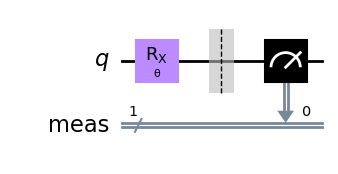

In [16]:
# Отображаем квантовую схему в виде диаграммы.
qc.draw("mpl")

In [17]:
# Определяем наблюдаемую (матрица Z)
observable = Operator([[1, 0], [0, -1]])  # Оператор Z

# Создаем симулятор
backend = Aer.get_backend('aer_simulator')

# Функция для вычисления наблюдаемой
def expectation_value(theta_val):
    # Привязываем параметр
    bound_qc = qc.bind_parameters({theta: theta_val})
    # Выполняем схему и получаем результат
    result = execute(bound_qc, backend, shots=1024).result()
    counts = result.get_counts()  # Получаем количество измерений
    # Вычисляем ожидаемое значение
    exp_val = (counts.get('0', 0) - counts.get('1', 0)) / 1024
    return exp_val

# Начальное значение параметра
theta_val = 0.5
epsilon = 1e-6  # Небольшое значение для финишной разности

# Вычисляем градиент с помощью финишной разности
grad = (expectation_value(theta_val + epsilon) - expectation_value(theta_val - epsilon)) / (2 * epsilon)

print("Градиент при θ =", theta_val, ":", grad)


Градиент при θ = 0.5 : 15625.0


In [7]:
import pennylane as qml
from pennylane import numpy as np

# a. Create a classical neural network with weights and biases
def classical_neural_network(x, weights, biases):
    return np.tanh(np.dot(weights, x) + biases)

# b. Transform the weights and biases into quantum parameters using angle encoding
def angle_encoding(weight, bias):
    return 2 * np.arctan(weight), 2 * np.arctan(bias)

# c. Implement quantum logic gates to create quantum circuits
def quantum_neural_network(params, x=None, y=None):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)

# d. Apply quantum optimization techniques to train the network
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit(params, x=None, y=None):
    quantum_neural_network(params)
    return qml.expval(qml.PauliZ(0))

def cost(params, X, Y):
    predictions = np.array([circuit(params, x=x) for x in X])
    return np.mean((predictions - Y) ** 2)

# Generate training data
X_train = np.linspace(-1, 1, 10)
Y_train = np.array([classical_neural_network(x, 2, 0.5) for x in X_train])

# Transform the weights and biases into quantum parameters
weight, bias = angle_encoding(2, 0.5)
params = np.array([weight, bias])

# Train the quantum neural network
opt = qml.GradientDescentOptimizer(stepsize=0.1)
steps = 100

for i in range(steps):
    params, prev_cost = opt.step_and_cost(cost, params, X_train, Y_train)
    if i % 10 == 0:
        print(f"Step {i}: cost = {prev_cost}")

# Evaluate the trained quantum neural network
predictions = np.array([circuit(params, x=x) for x in X_train])

ImportError: cannot import name 'metadata' from 'importlib' (C:\COMPINT\Python378\lib\importlib\__init__.py)